In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random, time
import cv2
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
dir_path = "C:/Users/iris168/DATA_MERGE _rename/"
img = cv2.imread(dir_path+'cells (1).jpg')
data= [np.array(img[:,:,0].reshape(-1),dtype = 'float32')]
for i in range (2,353):
    cell_img2_ = cv2.imread(dir_path+'cells ('+str(i)+').jpg')
    if (cell_img2_.shape == (50,50,3)):
        img2= np.array(cell_img2_[:,:,0].reshape(-1),dtype = 'float32')
        data_ = np.append(data, [img2], axis=0 )
        data = data_
    print(data.shape)

(2, 2500)
(3, 2500)
(4, 2500)
(5, 2500)
(6, 2500)
(7, 2500)
(8, 2500)
(9, 2500)
(10, 2500)
(11, 2500)
(12, 2500)
(13, 2500)
(14, 2500)
(15, 2500)
(16, 2500)
(16, 2500)
(17, 2500)
(18, 2500)
(19, 2500)
(20, 2500)
(21, 2500)
(22, 2500)
(23, 2500)
(24, 2500)
(25, 2500)
(26, 2500)
(27, 2500)
(28, 2500)
(28, 2500)
(29, 2500)
(30, 2500)
(31, 2500)
(32, 2500)
(33, 2500)
(34, 2500)
(35, 2500)
(36, 2500)
(37, 2500)
(38, 2500)
(39, 2500)
(40, 2500)
(41, 2500)
(42, 2500)
(43, 2500)
(44, 2500)
(45, 2500)
(46, 2500)
(47, 2500)
(48, 2500)
(49, 2500)
(50, 2500)
(51, 2500)
(52, 2500)
(53, 2500)
(54, 2500)
(55, 2500)
(56, 2500)
(57, 2500)
(58, 2500)
(59, 2500)
(60, 2500)
(61, 2500)
(62, 2500)
(63, 2500)
(64, 2500)
(65, 2500)
(66, 2500)
(67, 2500)
(68, 2500)
(69, 2500)
(70, 2500)
(71, 2500)
(72, 2500)
(73, 2500)
(74, 2500)
(75, 2500)
(76, 2500)
(77, 2500)
(78, 2500)
(79, 2500)
(80, 2500)
(81, 2500)
(82, 2500)
(82, 2500)
(83, 2500)
(84, 2500)
(85, 2500)
(86, 2500)
(87, 2500)
(88, 2500)
(89, 2500)
(90, 25

In [9]:
def rand_batch(data,batch_size):
    np.random.shuffle(data)
    return data[0:batch_size]

In [15]:
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

In [16]:
x = tf.placeholder(tf.float32, shape = [None, 2500])
e_W_1 = weight_variable([2500, 1000], "e_W_1")
e_b_1 = bias_variable([1000], "e_b_1")
e_layer1 = tf.nn.relu(tf.matmul(x, e_W_1) + e_b_1)
e_W_2 = weight_variable([1000, 500], "e_W_2")
e_b_2 = bias_variable([500], "e_b_2")
e_layer2 = tf.nn.relu(tf.matmul(e_layer1, e_W_2) + e_b_2)
e_W_3 = weight_variable([500, 100], "e_W_3")
e_b_3 = bias_variable([100], "e_b_3")
e_layer3 = tf.nn.relu(tf.matmul(e_layer2, e_W_3) + e_b_3)
e_W_4 = weight_variable([100, 20], "e_W_3")
e_b_4 = bias_variable([20], "e_b_3")
code_layer = tf.nn.relu(tf.matmul(e_layer3, e_W_4) + e_b_4)
d_W_0 = weight_variable([20, 100], "d_W_1")
d_b_0 = bias_variable([100], "d_b_1")
d_layer0 = tf.nn.relu(tf.matmul(code_layer, d_W_0) + d_b_0)
d_W_1 = weight_variable([100, 500], "d_W_1")
d_b_1 = bias_variable([500], "d_b_1")
d_layer1 = tf.nn.relu(tf.matmul(d_layer0, d_W_1) + d_b_1)
d_W_2 = weight_variable([500, 1000], "d_W_2")
d_b_2 = bias_variable([1000], "d_b_2")
d_layer2 = tf.nn.relu(tf.matmul(d_layer1, d_W_2) + d_b_2)
d_W_3 = weight_variable([1000, 2500], "d_W_3")
d_b_3 = bias_variable([2500], "d_b_3")
output_layer = tf.nn.relu(tf.matmul(d_layer2, d_W_3) + d_b_3)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
w_list = [e_W_1,e_W_2,e_W_3,d_W_1,d_W_2,d_W_3,d_W_0,e_W_4]
org_loss = tf.reduce_mean(tf.pow(output_layer - x, 2))
regularizer = tf.reduce_sum([tf.reduce_sum(
                             tf.pow(w,2)/(1+tf.pow(w,2))) for w in w_list]) \
                            /tf.reduce_sum(
                             [tf.size(w,out_type=tf.float32) for w in w_list])
loss = org_loss+regularizer
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(loss)
init_op = tf.global_variables_initializer()

In [18]:
n_split = 300
data_train, data_test = data[:n_split], data[n_split:]

In [19]:
data_train.shape

(300, 2500)

In [20]:
batch_size =10
sess = tf.InteractiveSession()
sess.run(init_op)
for i in range(30000):
    batch = rand_batch(data_train,batch_size)
    if i%100 == 0:
        print("step %d, loss %g"%(i, loss.eval(feed_dict={x:batch})))
    optimizer.run(feed_dict={x:batch})
    
print("final loss %g" % loss.eval(feed_dict={x:data_test}))

step 0, loss 31543.6
step 100, loss 10615.7
step 200, loss 9997.7
step 300, loss 9672.23
step 400, loss 8275.29
step 500, loss 9743.41
step 600, loss 8451.74
step 700, loss 8692.54
step 800, loss 9285.66
step 900, loss 8648.24
step 1000, loss 9112.6
step 1100, loss 8665.64
step 1200, loss 8473.34
step 1300, loss 8339.34
step 1400, loss 9953.58
step 1500, loss 8542.67
step 1600, loss 8630.17
step 1700, loss 8706.47
step 1800, loss 9140.14
step 1900, loss 7732.29
step 2000, loss 8776.67
step 2100, loss 8020.76
step 2200, loss 8237.12
step 2300, loss 8332.94
step 2400, loss 7553.95
step 2500, loss 9195.46
step 2600, loss 7163.88
step 2700, loss 7766.84
step 2800, loss 7759.64
step 2900, loss 7965.06
step 3000, loss 7581.03
step 3100, loss 7245.47
step 3200, loss 7565.31
step 3300, loss 7988.22
step 3400, loss 8650.08
step 3500, loss 7823.62
step 3600, loss 9747.48
step 3700, loss 8025.53
step 3800, loss 8818.83
step 3900, loss 8085.02
step 4000, loss 7611.21
step 4100, loss 7391.86
step 4

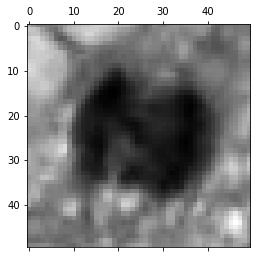

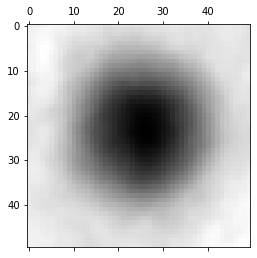

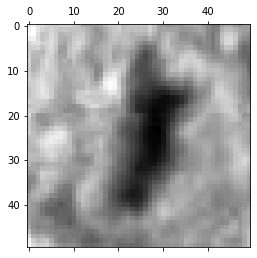

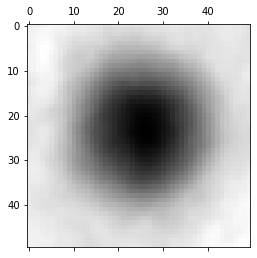

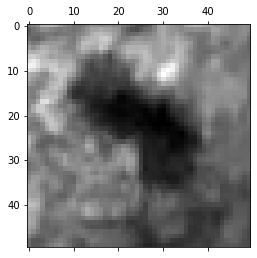

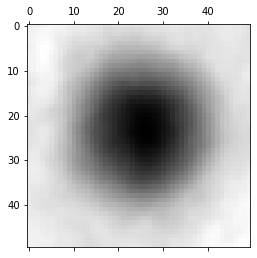

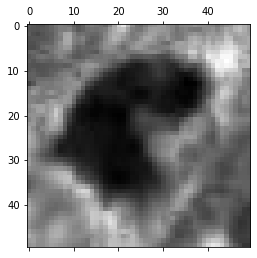

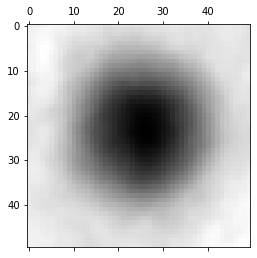

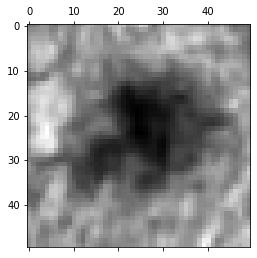

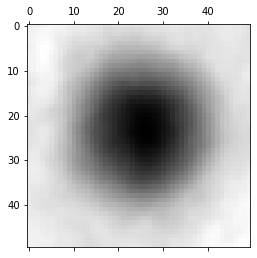

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = output_layer.eval(feed_dict = {x:data[100:200]})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:], (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))

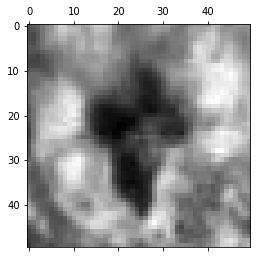

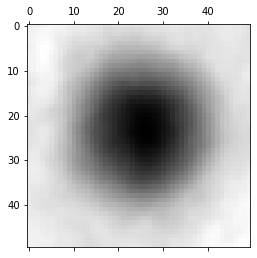

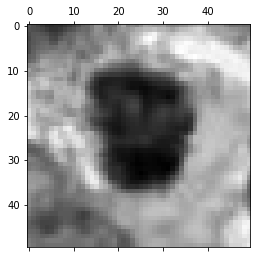

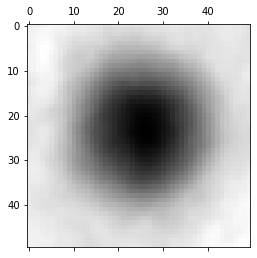

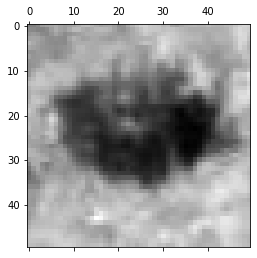

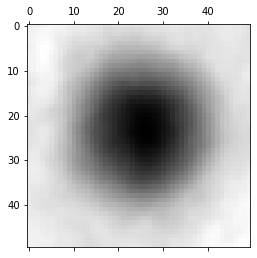

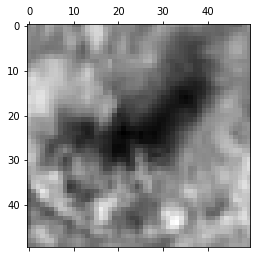

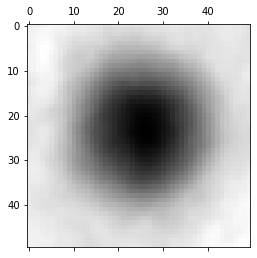

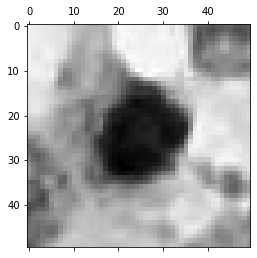

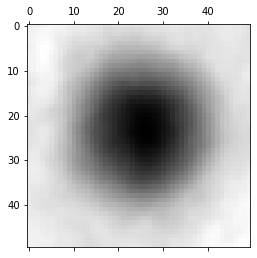

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = output_layer.eval(feed_dict = {x:data_test})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data_test[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:], (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))